## Trabalho Prático 1: Compressão de Imagens
- Luiza de Melo Gomes 

### Visão geral 

Este trabaho explora dois tipos de redundância: 
- **Redundância Psicovisual:** 

    Para explorar esse tipo de redundância foi implementada a redução nos níveis de cinza da imagem, e consequentemente a entropia foi reduzida. 
- **Redundância Interpixel:**

    Como os níveis de cinza foram diminuídos, o número de valores diferentes de pixels também foi reduzido. Pensando nesse aspecto, foi implementado o método de comprimento de corrida para explorar a similaridade entre os pixels 

### importação de bibliotecas

In [409]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image

%matplotlib inline

### funções básicas

In [813]:
def rmse(predictions, targets): 
    return np.sqrt(((predictions - targets) ** 2).mean())

def psnr(predictions, targets): 
    return 20 * np.log10(255/rmse(predictions, targets))

def entropy(image):
    hist = cv2.calcHist([image],[0],None,[256],[0,256])
    hist = hist.ravel()/hist.sum()
    logs = np.log2(hist+0.00001)
    entropy = -1 * (hist*logs).sum()
    return entropy

### Implementação do método de comprimento de corrida

In [814]:
def comprimento_corrida(img): 
   # ret,img = cv2.threshold(img,127,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    msg_codificada = []
    count = 0 
    bits = 8
    prev = None
    shape = img.shape
    fimg = img.flatten()
    for pixel in fimg: 
        if prev == None: 
            prev = pixel 
            count += 1 
        else: 
            if prev != pixel: 
                msg_codificada.append((count, prev))
                prev = pixel 
                count = 1 
            else: 
                if count<(2**bits)-1:
                    count+=1
                else:
                    msg_codificada.append((count, prev))
                    prev=pixel
                    count=1
    msg_codificada.append((count, prev))
    
    return np.array(msg_codificada)

### Método para restaurar a imagem codificada

In [815]:
def decodifica_comp_corrida(msg_codificada, shape): 
    msg_decodificada = []
    for comprimento in msg_codificada: 
        count = comprimento[0] 
        pixel = comprimento[1]
        msg_decodificada.extend([pixel] * count)
    img = np.array(msg_decodificada).reshape(shape)
    return img

### Leitura da imagem 

In [816]:
img = cv2.imread('lena512.pgm', 0)

### Aplicando a redução para 4 bits
Quando comparamos com a imagem original, nota-se que as mudanças são quase imperceptíveis. 

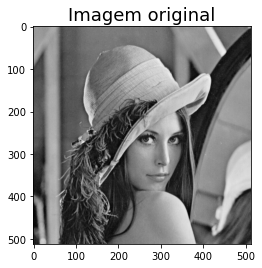

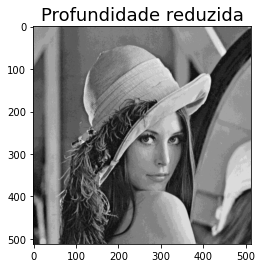

In [829]:
img2 = img & 0b11110000
plt.imshow(img, cmap='gray')
plt.title('Imagem original', {'fontsize': 18})
plt.show()
plt.imshow(img2, cmap='gray')
plt.title('Profundidade reduzida', {'fontsize': 18})
plt.show()

### Aplicando o comprimento de corrida

In [830]:
rle = comprimento_corrida(img2)

In [831]:
len(rle)

88004

In [832]:
rle.shape

(88004, 2)

In [833]:
print(rle)

[[  5 160]
 [  1 144]
 [  6 160]
 ...
 [  3  64]
 [  3  80]
 [  6  96]]


### Salvando a imagem 
O que é salvo nessa etapa é um np.ndarray no formato png. Foi feito o armazenamento em outros formatos, mas o png foi o que gastou menos espaço. 

In [834]:
cv2.imwrite('rle.png', rle)

True

### Restaurando a imagem

In [835]:
img_comprimida = cv2.imread('rle.png', 0)

In [836]:
print(img_comprimida)

[[  5 160]
 [  1 144]
 [  6 160]
 ...
 [  3  64]
 [  3  80]
 [  6  96]]


In [837]:
img_comprimida = decodifica_comp_corrida(img_comprimida, shape)

In [838]:
img_comprimida.shape

(512, 512)

### Comparação com a imagem original 

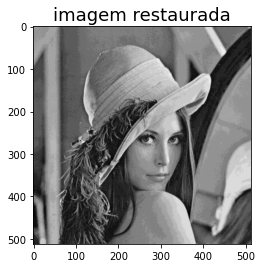

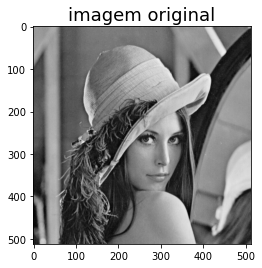

In [841]:
plt.imshow(img_comprimida, cmap='gray')
plt.title('imagem restaurada', {'fontsize': 18})
plt.show()

plt.imshow(img, cmap='gray')
plt.title('imagem original', {'fontsize': 18})
plt.show()

### Análises sobre a eficiência 

In [811]:
tam_original = os.path.getsize('lena512.pgm')
tam_comprimido = os.path.getsize('rle.png') 
tx_compressao = tam_original / tam_comprimido
tx_reducao = (tam_original - tam_comprimido) / tam_original
print('Taxa de compressão: {:.2f}'.format(tx_compressao))
print('Reducao de {:.2f}%'.format(tx_reducao))
print('PSNR: {:.2f}'.format(psnr(img_comprimida, img)))
print('RMSE: {:.2f}'.format(rmse(img_comprimida, img)))
print('Entropia da imagem original: {:.2f}'.format(entropy(img)))
print('Entropia da imagem comprimida: {:.2f}'.format(entropy(img4)))

Taxa de compressão: 2.03
Reducao de 0.51%
PSNR: 29.21
RMSE: 8.83
Entropia da imagem original: 7.44
Entropia da imagem comprimida: 0.80
